## <img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico 2
#### Nombre y Apellido : Fabián Catuogno

***
## Ventanas


<div class="alert alert-block alert-info">
<b>1)</b> Implemente las funciones para generar las siguientes ventanas $w(k)$:

</div>

+ Bartlett ó triangular
+ Hann
+ Blackman
+ Flat-top



<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede consultar el capítulo 6.3 del libro de B. Porat para obtener las expresiones analíticas de cada ventana.

</div>

   a) Para cada ventana grafique $w(k)$ y el módulo de su espectro $ \lvert W(\Omega) \rvert $


<div class="alert alert-block alert-warning">
<img src="./ojo.svg" align="left" width="50" />  Normalice la amplitud máxima de todas las ventanas a 0 dB.
</div>

In [22]:
## Inicialización del Notebook del TP2

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import DataFrame
from IPython.display import HTML

#Config Tamaño de Plots
plt.rcParams['figure.figsize'] = [10, 5]

N  = 1000 # muestras
fs = 1000 # Hz

# Insertar aquí el código para inicializar tu notebook
########################################################

import scipy.signal as signal

<ipython-input-37-0a8fa53384f9>:48: RuntimeWarning: divide by zero encountered in log10
  ax2.plot(frec, 20*np.log10(espectro[0:,index]), label=Ventanas[index])


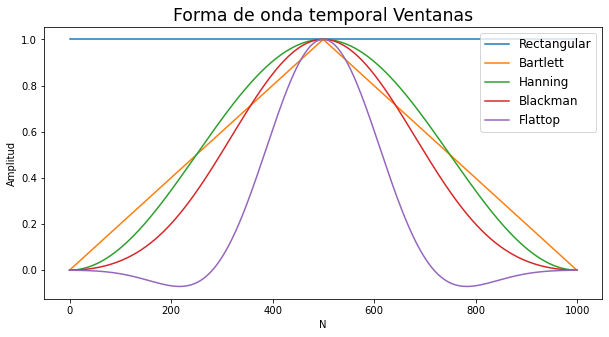

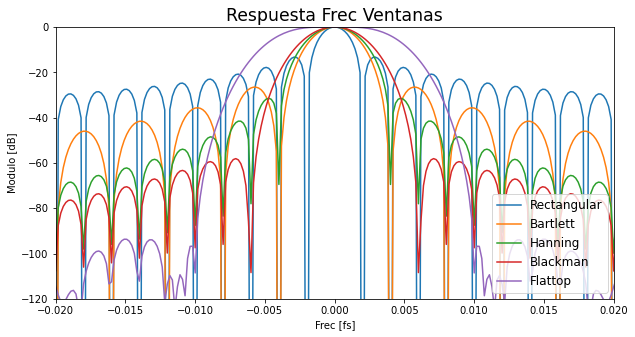

In [37]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################

#Cantidad de Zero Padding
nn = 10*N

Ventanas = { 0:'Rectangular', 1:'Bartlett', 2:'Hanning', 3:'Blackman', 4:'Flattop' }

# Generacion de Matriz con Ventanas
########################################################
VentRect = np.ones(N)
VentBarlett = signal.windows.bartlett(N)
VentHann = signal.windows.hann(N)
VentBlack = signal.windows.blackman(N)
VentFlat = signal.windows.flattop(N)

matriz = np.column_stack(([VentRect, VentBarlett,VentHann, VentBlack, VentFlat]))


#Graficas Temporales de Ventanas
plt.close('all')
fig, ax1 = plt.subplots()

for index in Ventanas:
    
    ax1.plot(matriz[0:,index], label=Ventanas[index])
  

ax1.set_title('Forma de onda temporal Ventanas', fontsize = 'xx-large')
ax1.set_ylabel('Amplitud')
ax1.set_xlabel('N')
ax1.legend(loc='upper right', fontsize='large')  # Add a legend.

#Zero Padding
matriz = np.concatenate((matriz,np.zeros([nn, matriz.shape[1]])))

#Calculo de DFT
espectro = np.abs(np.fft.fft(matriz, axis=0))/len(VentBlack)
espectro = np.fft.fftshift(espectro, axes=0)
frec = np.fft.fftfreq(espectro.shape[0],0.5) #Normalizo respecto a Nyquist
frec = np.fft.fftshift(frec)

#Graficas de Espectro
fig, ax2 = plt.subplots()
for index in Ventanas:
    espectro[0:,index] /= np.amax(espectro[0:,index]) #Normalizo todas a 0dB
    ax2.plot(frec, 20*np.log10(espectro[0:,index]), label=Ventanas[index])
 
plt.xlim(-0.02, 0.02)
plt.ylim(-120,0)
ax2.set_title('Respuesta Frec Ventanas', fontsize = 'xx-large')
ax2.set_ylabel('Modulo [dB]')
ax2.set_xlabel('Frec [fs]')
ax2.legend(loc='lower right', fontsize='large')

b) Construya una tabla en la que figure la anchura normalizada del lóbulo principal  de la ventana, $\Omega_1$, siendo 

$$ \lvert W(\Omega_1) \rvert = \frac{\sqrt{2}}{2}$$ 

y el valor de transferencia máxima de los lóbulos secundarios expresado en dB 

$$ W_2 = \mathop{max} \{\lvert W(\Omega) \rvert\} ,\space\space \forall \space \Omega \geq \Omega_0 $$

siendo $\Omega_0$ la frecuencia del primer cruce por cero $\lvert W(\Omega) \rvert\ = 0$ ó la frecuencia límite superior del lóbulo principal. Utilice como norma de frecuencia la frecuencia de Nyquist, de manera que las mediciones de frecuencias sean adimensionales y comparables independientemente de la frecuencia de muestreo.

<ipython-input-38-9c355a179879>:18: RuntimeWarning: divide by zero encountered in log10
  ax2.plot(frec,np.log10(espectro[0:,index]), label=Ventanas[index])


,$f_1$ (#),$W_2$ (dB)
Rectangular,[16.629038033332108],-13.286376
Bartlett,[25.250599146962486],-26.566965
Hann,[28.445213093347775],-31.467329
Blackman,[33.11945245572497],-58.110182
Flat-top,[60.28322367569854],-93.064809


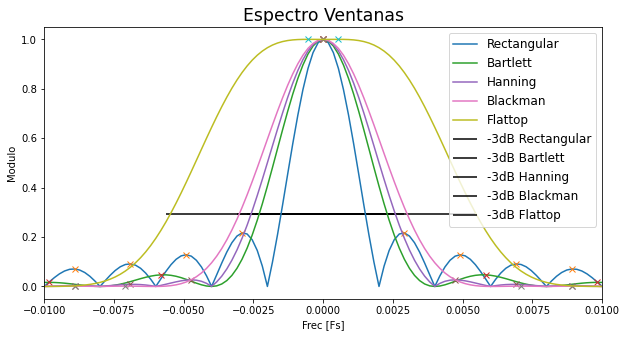

In [38]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   #['', ''], # <-- acá debería haber numeritos :)
                   #['', ''], # <-- acá debería haber numeritos :)
                   #['', ''], # <-- acá debería haber numeritos :)
                   #['', ''], # <-- acá debería haber numeritos :)
                   #['', ''] # <-- acá debería haber numeritos :)
                 ]

AnchoLobulo = []

fig, ax3 = plt.subplots()
for index in Ventanas:

    ax2.plot(frec,np.log10(espectro[0:,index]), label=Ventanas[index])
    pico = np.argmax(espectro[0:,index])
    picos,_ = signal.find_peaks(espectro[0:,index],)
    valorpicos = np.sort(espectro[0:,index][picos])
    diff_dB = 20*np.log10(valorpicos[-3]/valorpicos[-1])
    AnchoLobulo.append(signal.peak_widths(espectro[0:,index],[pico],rel_height=np.sqrt(2)/2))
    ax3.plot(frec,espectro[0:,index], label=Ventanas[index])
    ax3.hlines(AnchoLobulo[index][1],frec[int(AnchoLobulo[index][2])], frec[int(AnchoLobulo[index][3])], label='-3dB %s' %Ventanas[index])
    plt.plot(frec[picos], espectro[0:,index][picos], "x")
    
    tus_resultados.append([AnchoLobulo[index][0],diff_dB])
    
plt.xlim(-0.01, 0.01)
ax3.set_title('Espectro Ventanas', fontsize = 'xx-large')
ax3.set_ylabel('Modulo')
ax3.set_xlabel('Frec [Fs]')
ax3.legend(loc='upper right', fontsize='large')

df = DataFrame(tus_resultados, columns=['$f_1$ (#)', '$W_2$ (dB)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


<div class="alert alert-block alert-info">
<b>2)</b> Genere una señal bitonal de las siguientes características
</div>


  $  x(k) = x_1(k) + x_2(k) $

  $  x_1(k) = sen(\Omega_1·k)$

  $  x_2(k) = a_2 · sen(\Omega_2·k)   $

siendo 

  $\Omega_1 = \frac{\pi}{2}$

  $\Omega_2 = \Omega_1 + 10·\frac{2\pi}{N}$

  $a_2 = -40$ dB


Responda a las siguientes consignas:

<div class="alert alert-block alert-info">
<b>2.a)</b>  Calcule el espectro $ \lvert X(\Omega) \rvert $

</div>

Text(0.5, 0, 'Frec [rad]')

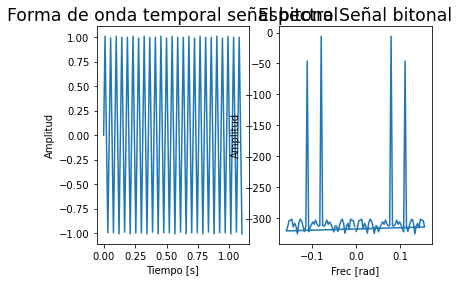

In [10]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################

def mi_funcion_sen( vmax, dc, ff, ph, nn, fs):
    '''Genera una senial senoidal con los parametros indicados.

    Keyword arguments:
    vmax -- Valor pico de la senoidal
    dc -- componente de continua de la senial
    ff -- frecuencia de la senial
    ph -- fase de la senial
    nn -- numero de muestras de la senial
    fs - frecuencia de muestro de la senial
                                

    Returns: array of float, array of float

    '''  
    tt = np.arange(0.0, nn/fs, 1/fs)
    
    xx = dc + vmax*np.sin((2*np.pi*ff*tt+ph))
    
    return(tt, xx)

# Resolucion espectral
############################

N  = 100 # muestras
fs = 90 # Hz

##################
# a.4) Senoidal #
#################

a1 = 1     # Volts
p1 = 0     # radianes
f1 = fs/4 # Hz

a2_dB = -40

a2 = 10**(a2_dB/20)
f2 = f1 + 10*fs/N

Offset = 0 #Volt
p0 = 0

tiempo, xx = mi_funcion_sen( a1, Offset, f1, p0, N, fs)
tiempo2, xx2 = mi_funcion_sen( a2, Offset, f2, p0, N, fs)
xx += xx2

espectro = np.abs(np.fft.fft(xx))/len(xx)
espectro = 20*np.log10(espectro)
frec = np.fft.fftfreq(len(xx),np.pi)

plt.close('all')

fig, [ax1, ax2] = plt.subplots(1,2)
ax1.plot(tiempo, xx, label='')
ax2.plot(frec,espectro, label='')

ax1.set_title('Forma de onda temporal señal bitonal', fontsize = 'xx-large')
ax1.set_ylabel('Amplitud')
ax1.set_xlabel('Tiempo [s]')

ax2.set_title('Espectro Señal bitonal', fontsize = 'xx-large')
ax2.set_ylabel('Amplitud')
ax2.set_xlabel('Frec [rad]')

<div class="alert alert-block alert-info">
<b>2.b)</b> Repita a) disminuyendo la amplitud de $x_2$.
</div>

¿Cuál es el factor de escala mínimo de $x_2$, definido como $a^0_2$, que permite evidenciar su existencia en el espectro de $\lvert X(\Omega) \rvert$ ?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

¿De qué depende poder medir $x_2$?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

Considere ahora que esta señal proviene de un ADC de 16 bits. Incorpore al análisis el correspondiente ruido de cuantización. ¿Cómo afecta esta situación la medición de $x_2$?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

In [21]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################


<div class="alert alert-block alert-info">
<b>2.c)</b> Repita a) incrementando la frecuencia de $x_1$ para $\Omega_1 = \frac{\pi}{2} + d_1·\frac{2\pi}{N}$ para valores de $d_1 = (0,01; 0.25; 0.5)$. Aumente la amplitud de $a_2$ hasta que se evidencie sobre el leakage y construya una tabla con dicho valor para las 3 situaciones correspondientes a desintonías leve, moderada y máxima.
</div>

In [22]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################



#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   '', # <-- acá debería haber numeritos :)
                   '', # <-- acá debería haber numeritos :)
                   '' # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$a_2$ (dB)'],
               index=[  
                        'leve',
                        'moderada',
                        'máxima',
                     ])
HTML(df.to_html())

,$a_2$ (dB)
leve,
moderada,
máxima,


<div class="alert alert-block alert-info">
<b>2.d)</b> Evalúe el efecto de utilizar las ventanas implementadas en 1). Complete la tabla comparativa con respecto a la ventana rectangular, respecto a las mediciones $a^0_2$ realizada en 2.b); y $a^1_2$ en 2.c) para el caso de desintonía máxima.
</div>

Grafique $\lvert X_w(\Omega) \rvert = \lvert \mathcal{F}\{ x(k) · w(k) \} \rvert $ para las 4 ventanas de 1).

In [23]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################



In [24]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''] # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$a^0_2$ (dB)','$a^1_2$ (dB)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$a^0_2$ (dB),$a^1_2$ (dB)
Rectangular,,
Bartlett,,
Hann,,
Blackman,,
Flat-top,,


<div class="alert alert-block alert-info">
<b>2.e)</b> Para las ventanas analizadas en 1), decida cuál sería la más apropiada en el caso que, <b>sin afectar otro parámetro</b>, $\Omega_2$ pudiera acercarse libremente a $\Omega_1 = \frac{\pi}{2} + 0.5·\frac{2\pi}{N}$. Complete la siguiente tabla con la distancia mínima, $\Omega_0, $ a la que se puede distinguir $x_2$ en $\lvert X_w(\Omega) \rvert$.
</div>

In [25]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   '', # <-- acá debería haber numeritos :)
                   '', # <-- acá debería haber numeritos :)
                   '', # <-- acá debería haber numeritos :)
                   '', # <-- acá debería haber numeritos :)
                   '' # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$\Omega_0$ (#)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$\Omega_0$ (#)
Rectangular,
Bartlett,
Hann,
Blackman,
Flat-top,


<div class="alert alert-block alert-info">
<b>3)</b> Genere la siguiente señal 

</div>

  $  x(k) = a_0·\mathop{sen}(\Omega_1·k)$


siendo 

  $a_0 = 2$

  $\Omega_1 = \Omega_0 + f_r·\frac{2\pi}{N} $

  $\Omega_0 = \frac{\pi}{2} $
  
y la variable aleatoria definida por

  $f_r \sim \mathcal{U}(-2, \, 2) $

Considere 200 realizaciones para cada experimento requerido en los siguiente incisos.


<div class="alert alert-block alert-info">
<b>3.a)</b> Calcule experimentalmente el sesgo y la varianza del siguiente estimador:
</div>

 
  $ \hat{a_0} = \lvert X^i_w(\Omega_0) \rvert$
  
siendo

  $\lvert X^i_w(\Omega) \rvert = \lvert \mathcal{F}\{ x(k) · w_i(k) \} \rvert $ 
  
para la *i*-ésima ventana de las 5 utilizadas en el punto 2).

El sesgo y la varianza se definen para este caso como

  $ s_a = \mathop{E}\{ \hat{a_0}\} - a_0  $
    
  $ v_a = \mathop{var} \{ \hat{a_0} \} = \mathop{E}\{ ( \hat{a_0} - \mathop{E} \{ \hat{a_0} \} )^2 \} $
  
y pueden aproximarse cuando consideramos los valores esperados como las medias muestrales ($a=a_0$ para simplificar la notación)

  $ \mathop{E}\{ \hat{a_0}\}  = \hat{\mu_a} =  \frac{1}{M} \sum^{M-1}_{j=0} \hat{a_{j}} $
  
  $ s_a = \hat{\mu_a} - a  $
    
  $ v_a = \frac{1}{M} \sum^{M-1}_{j=0} (\hat{a_{j}} - \hat{\mu_a})^2 $



Grafique los histogramas para  $\lvert X^i_w(\Omega_0) \rvert$. 

<div class="alert alert-block alert-danger">
<img src="./ojo.svg" align="left" width="50" />   Cuide que todos los gráficos tengan <b>el mismo rango de valores en X</b> para facilitar la comparación.
</div>

In [26]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################



In [27]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$s_a$', '$v_a$'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$s_a$,$v_a$
Rectangular,,
Bartlett,,
Hann,,
Blackman,,
Flat-top,,


<div class="alert alert-block alert-info">
<b>3.b)</b> Repita a) para el siguiente estimador:
</div>

 
  $ \hat{a_1} = \sqrt{\frac{1}{5}·\sum_{j=a}^{b} \lvert X^i_w(j) \rvert ^2} $
  
siendo $ a = \Omega_0 - 2·\frac{2\pi}{N} $ y $ b = \Omega_0 + 2·\frac{2\pi}{N} $

para la *i*-ésima ventana de las 5 utilizadas en el punto 2).

Grafique los histogramas para  $\lvert X^i_w(\Omega_0) \rvert$. 

<div class="alert alert-block alert-danger">
<img src="./ojo.svg" align="left" width="50" />   Cuide que todos los gráficos tengan <b>el mismo rango de valores en X</b> para facilitar la comparación.
</div>

In [28]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################



In [29]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$s_a$', '$v_a$'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$s_a$,$v_a$
Rectangular,,
Bartlett,,
Hann,,
Blackman,,
Flat-top,,
